In [1]:
import tensorflow as tf
print(tf.__version__)


2.18.0


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9023 - loss: 0.3161 - val_accuracy: 0.9850 - val_loss: 0.0470
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9852 - loss: 0.0464 - val_accuracy: 0.9897 - val_loss: 0.0317
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9905 - loss: 0.0291 - val_accuracy: 0.9904 - val_loss: 0.0304
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9938 - loss: 0.0210 - val_accuracy: 0.9927 - val_loss: 0.0230
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9953 - loss: 0.0156 - val_accuracy: 0.9927 - val_loss: 0.0249
313/313 - 1s - 5ms/step - accuracy: 0.9927 - loss: 0.0249

Test accuracy: 0.9926999807357788


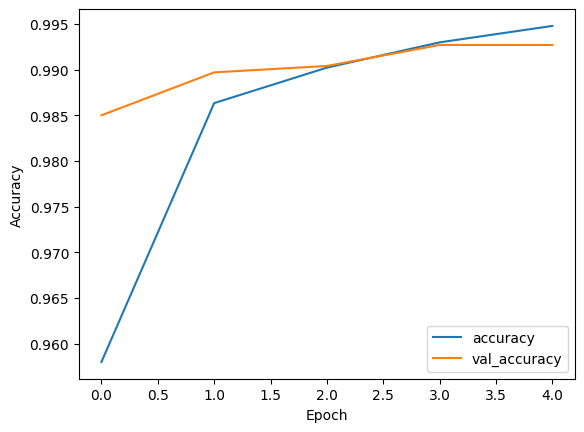

In [3]:
#Image Classification using TensorFLow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Load MNIST dataset (handwritten digits 0-9)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values to [0, 1] range
x_train, x_test = x_train / 255.0, x_test / 255.0

# Expand dimensions for CNN input (28x28 -> 28x28x1)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# Build a simple CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output classes
])

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
